1. Package import

In [237]:
import os

from mpl_toolkits import mplot3d


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

2. read input

In [238]:
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

3. make array and initilize value

In [239]:
datanum= 200

epoch =2000

# array for graph
loss_Array=np.zeros((epoch,1))
W_Array=np.zeros((epoch,1))
B_Array=np.zeros((epoch,1))
x_epoch=np.arange(epoch)


4. Processing Gradient decent(training)

In [240]:
lr=0.001 #learning Rate

W=-30
B=-30

for iter in range(epoch):
        
    #calculate the loss
    loss=1/(2*datanum)*np.sum((W*x_data+B-y_data)*(W*x_data+B-y_data))
    loss_Array[iter]=loss
    
    W_ = 1/datanum*np.sum((W*x_data+B-y_data)*x_data)
    B_ = 1/datanum*np.sum(W*x_data+B-y_data)

    # update the parameters
    W = W - W_ * lr 
    B = B - B_ * lr
    
    W_Array[iter] = W
    B_Array[iter] = B
 

5. draw the line

In [241]:
x_line = np.arange(-10,10,0.1)
y_line = W*x_line+B

6. plotting the input data

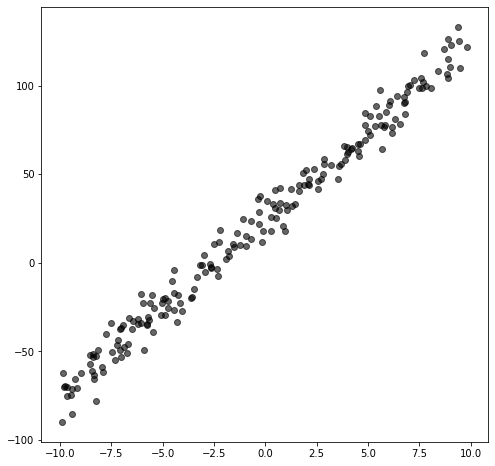

In [242]:
plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data,alpha=0.6, c="black")
plt.show()

7. linear regression result

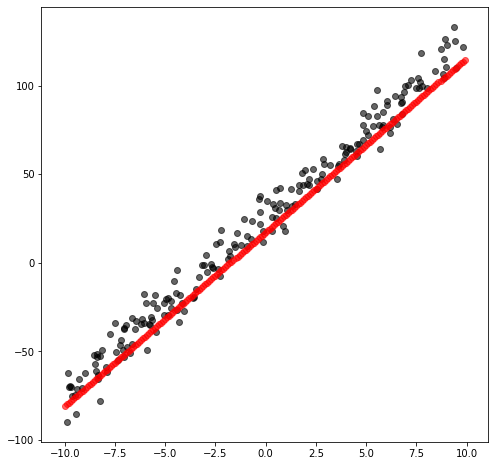

In [243]:
plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, alpha=0.6,c="black")
plt.scatter(x_line, y_line, alpha=0.6,c="red")
plt.show()

8. Plot the energy surface

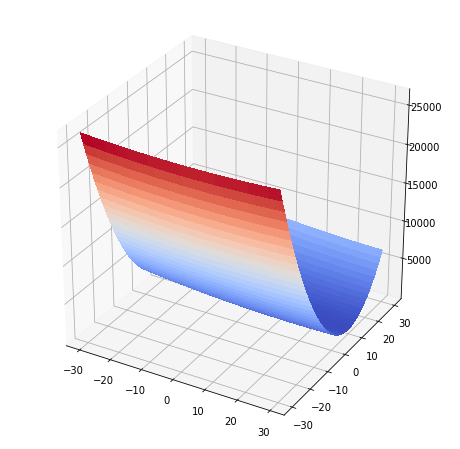

In [244]:
def f(x):
    loss= 0
    for i in range(len(data)):
        x_ = data[i,0]
        y_ = data[i,1]
        loss = loss + (x[1]*x_+x[0]-y_)**2
    
    return loss/(2*float(len(data)))

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(-30, 30, 0.1)
y = np.arange(-30, 30, 0.1)
X,Y = np.meshgrid(x,y)
Z =f((X,Y))
# Plot the surface.
surf = ax.plot_surface(X, Y, Z,cmap='coolwarm', linewidth=0, antialiased=False)

plt.show()


9. Plot the gradient descent path on the energy surface

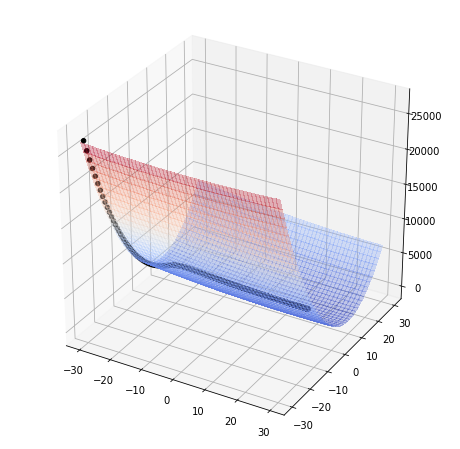

In [245]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')


# Make data.
x = np.arange(-30, 30, 0.1)
y = np.arange(-30, 30, 0.1)
X,Y = np.meshgrid(x,y)
Z =f((X,Y))
# Plot the surface.
surf = ax.plot_surface(X, Y, Z,cmap='coolwarm', linewidth=0, antialiased=False,alpha=0.3)
# plot the gradient decent path
ax.scatter3D(B_Array, W_Array, loss_Array,c="black");

plt.show()
